In [115]:
# importing modules and packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import librosa.display
from scipy.stats import kurtosis, skew, stats

In [16]:
# specify working directory
data_dir = './Pitt/Control/cookie'
audio_files = glob(data_dir + '/*.mp3')

# sanity check to verify directory is correct
len(audio_files)

243

In [87]:
#reading in audio file and make time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

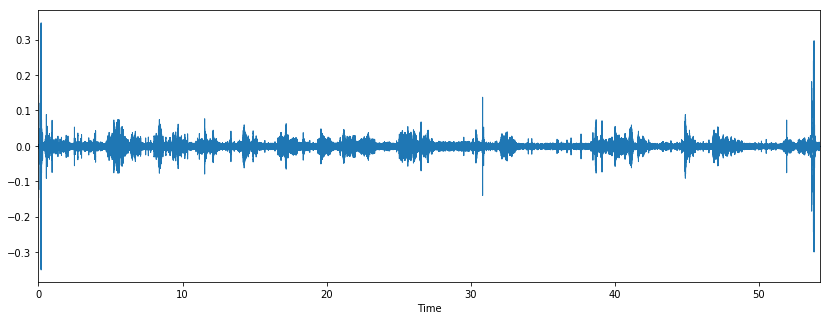

In [88]:
# simple plotting time vs. amplitude 
plt.figure(figsize=(14, 5))
lr.display.waveplot(audio, sfreq)

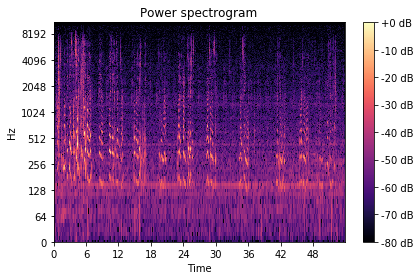

In [64]:
spec = np.abs(lr.stft(audio))
lr.display.specshow(lr.amplitude_to_db(spec, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [ ]:
# LLDs: ZCR, RMS Energy, Pitch Frequency, HNR, MFCC 1-12
# Functionals: Mean, Standard Deviation, Kurtosis, Skewness, Minimum, Maximum, Relative Position, Range, Lin regression slope, Lin regression offset, Lin regression mean square error

In [181]:
features_dict = {}

In [182]:
def get_func_dict(array):
    func_dict = {}
    
    #Compute functionals
    arr_mean = np.mean(array)
    arr_std = np.std(array)
    arr_kurt = kurtosis(array)
    arr_skew = skew(array)
    arr_min = np.amin(array)
    arr_max = np.amax(array)
    arr_range = arr_max - arr_min
    
    #Add to func dict
    func_dict["mean"] = arr_mean
    func_dict["std"] = arr_std
    func_dict["kurt"] = arr_kurt
    func_dict["skew"] = arr_skew
    func_dict["min"] = arr_min
    func_dict["max"] = arr_max
    func_dict["range"] = arr_range
    
    return func_dict

In [183]:
def get_zcr_features():
    #Compute zero crossing rate
    #Each element is the fraction of zero crossings in the ith frame
    zcr = lr.feature.zero_crossing_rate(audio) 
    
    #Add functionals to features_dict
    features_dict["zcr"] = get_func_dict(zcr[0])
    
    #Plot zcr
    plt.figure(figsize=(14, 5))
    plt.title("ZCR Graph")
    plt.plot(zcr[0])

In [184]:
def get_mfcc_features():
    #Compute mfcc
    mfcc = lr.feature.mfcc(audio, 22050, None, 12)

    #Add functionals to features_dict
    for i in range(len(mfcc)):
        features_dict["mfcc" + str(i + 1)] = get_func_dict(mfcc[i])

In [185]:
def get_rms_features():
    #Compute rms
    rms = lr.feature.rms(audio)
    
    #Add functionals to features_dict
    features_dict["rms"] = get_func_dict(rms[0])

zcr:{'mean': 0.10722434684021832, 'std': 0.059951173551469734, 'kurt': 7.81524118302773, 'skew': 2.456145023546909, 'min': 0.0244140625, 'max': 0.46044921875, 'range': 0.43603515625}

mfcc1:{'mean': -385.04810190885047, 'std': 40.052819057102944, 'kurt': 13.443341251905036, 'skew': 2.2597989127146496, 'min': -642.2857528328187, 'max': -36.19294181289932, 'range': 606.0928110199194}

mfcc2:{'mean': 102.83275112716146, 'std': 20.709909552955832, 'kurt': 1.7697889712463235, 'skew': -0.6079750408402671, 'min': 21.295424902265246, 'max': 170.89129686552283, 'range': 149.5958719632576}

mfcc3:{'mean': -5.76188361274346, 'std': 11.756265235685047, 'kurt': 4.471197412458778, 'skew': -1.0076881890973477, 'min': -80.54353858663652, 'max': 45.1614713615069, 'range': 125.70500994814341}

mfcc4:{'mean': 24.188516008765436, 'std': 14.1867090619438, 'kurt': 1.8008468312484407, 'skew': 0.7046905050143241, 'min': -24.222260135478255, 'max': 92.0081905394785, 'range': 116.23045067495676}

mfcc5:{'mean':

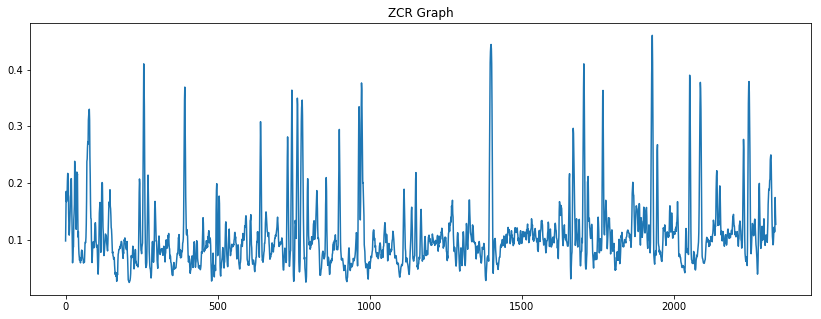

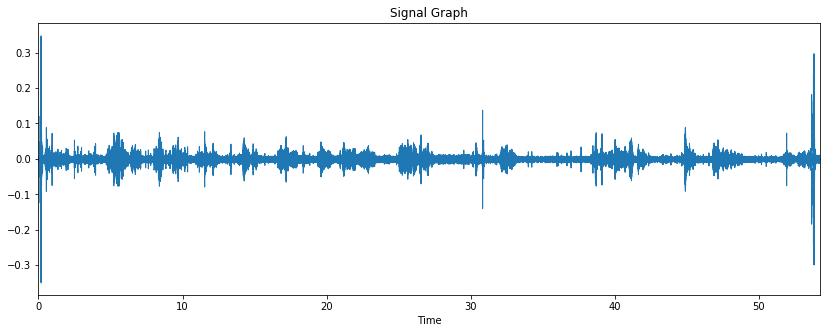

In [187]:
get_zcr_features()
get_mfcc_features()
get_rms_features()

plt.figure(figsize=(14, 5))
plt.title("Signal Graph")
lr.display.waveplot(audio, sfreq)

features_count = 0;
for key, value in features_dict.items():
    print(key + ":" + str(value) + "\n")
    features_count += len(value)
    
print("total features: " + str(features_count))